This is file is used to analyze the quality of our demand estimation by comparing the demand estimation price with the actual prices.

In [1]:
import pandas as pd
import numpy as np
from preprocess import *
import matplotlib.pyplot as plt

In [2]:
base_df = get_cleaned_data()
demand_df = get_demand_data()


In [3]:
print(base_df.shape)
print(demand_df.shape)

(637976, 12)
(452180, 10)


In [4]:
base_df.car_type.unique()

array(['Luxury SUV', 'Luxury', 'Base', 'Base XL',
       'Wheel Chair Accessible', 'Shared'], dtype=object)

In [5]:
def get_mean_data(base_df,demand_df):
    """"
    Load base and demand dataframes and group by mean per combination of source,destination for two car_types
    Args:
        Base DataFrame
        Demand DataFrame
    Returns:
        DataFrame
        DataFrame
        DataFrame
        DataFrame
    """
    # Calculate mean price for 'Base' car type
    mean_base_base_df = base_df[base_df['car_type'] == 'Base'].groupby(['source', 'destination']).price.mean().reset_index()
    mean_base_demand_df = demand_df[demand_df['car_type'] == 'Base'].groupby(['source', 'destination']).price.mean().reset_index()

    # Calculate mean price for 'Luxury SUV' car type
    mean_luxury_base_df = base_df[base_df['car_type'] == 'Luxury SUV'].groupby(['source', 'destination']).price.mean().reset_index()
    mean_luxury_demand_df = demand_df[demand_df['car_type'] == 'Luxury SUV'].groupby(['source', 'destination']).price.mean().reset_index()

    return(mean_base_base_df, mean_base_demand_df, mean_luxury_base_df,mean_luxury_demand_df)


In [6]:
def get_mean_difference(df1, df2):
    """
    Calculate the Mean price difference between two dataframes
    Metric for quantifying Best Demand Estimation
    """
    # Ensure 'price' column exists in both dataframes
    if 'price' in df1.columns and 'price' in df2.columns:
        # Sort both dataframes by 'source', 'destination', 'car_type', and 'datetime'
        sort_columns = ['source', 'destination', 'car_type', 'date_time']
        
        df1_sorted = df1.sort_values(by=sort_columns)
        df2_sorted = df2.sort_values(by=sort_columns)

        # Check if sorted dataframes have the same length
        if len(df1_sorted) == len(df2_sorted):
            # Calculate the difference in prices
            diff = df1_sorted['price'] - df2_sorted['price']
            mean_diff = diff.mean()
            return mean_diff
        else:
            raise ValueError("DataFrames do not match in length after sorting.")
    else:
        raise ValueError("Both DataFrames must contain a 'price' column.")

In [7]:
def plot_mean_price(data, title, label, ax):
    """"
    Create mean price plots for combinations of source-destination and car_types
    """
    # Combining source and destination for a unique identifier
    data['source_destination'] = data['source'] + '-' + data['destination']
    data = data.sort_values('source_destination')
    
    # Adding label for the line
    ax.plot(data['source_destination'], data['price'], marker='o', label=label)
    ax.set_title(title)
    ax.set_xlabel('Source-Destination')
    ax.set_ylabel('Mean Price')
    ax.tick_params(axis='x', rotation=90)  # Rotate x labels for readability

    # Add legend to the plot
    ax.legend()
    


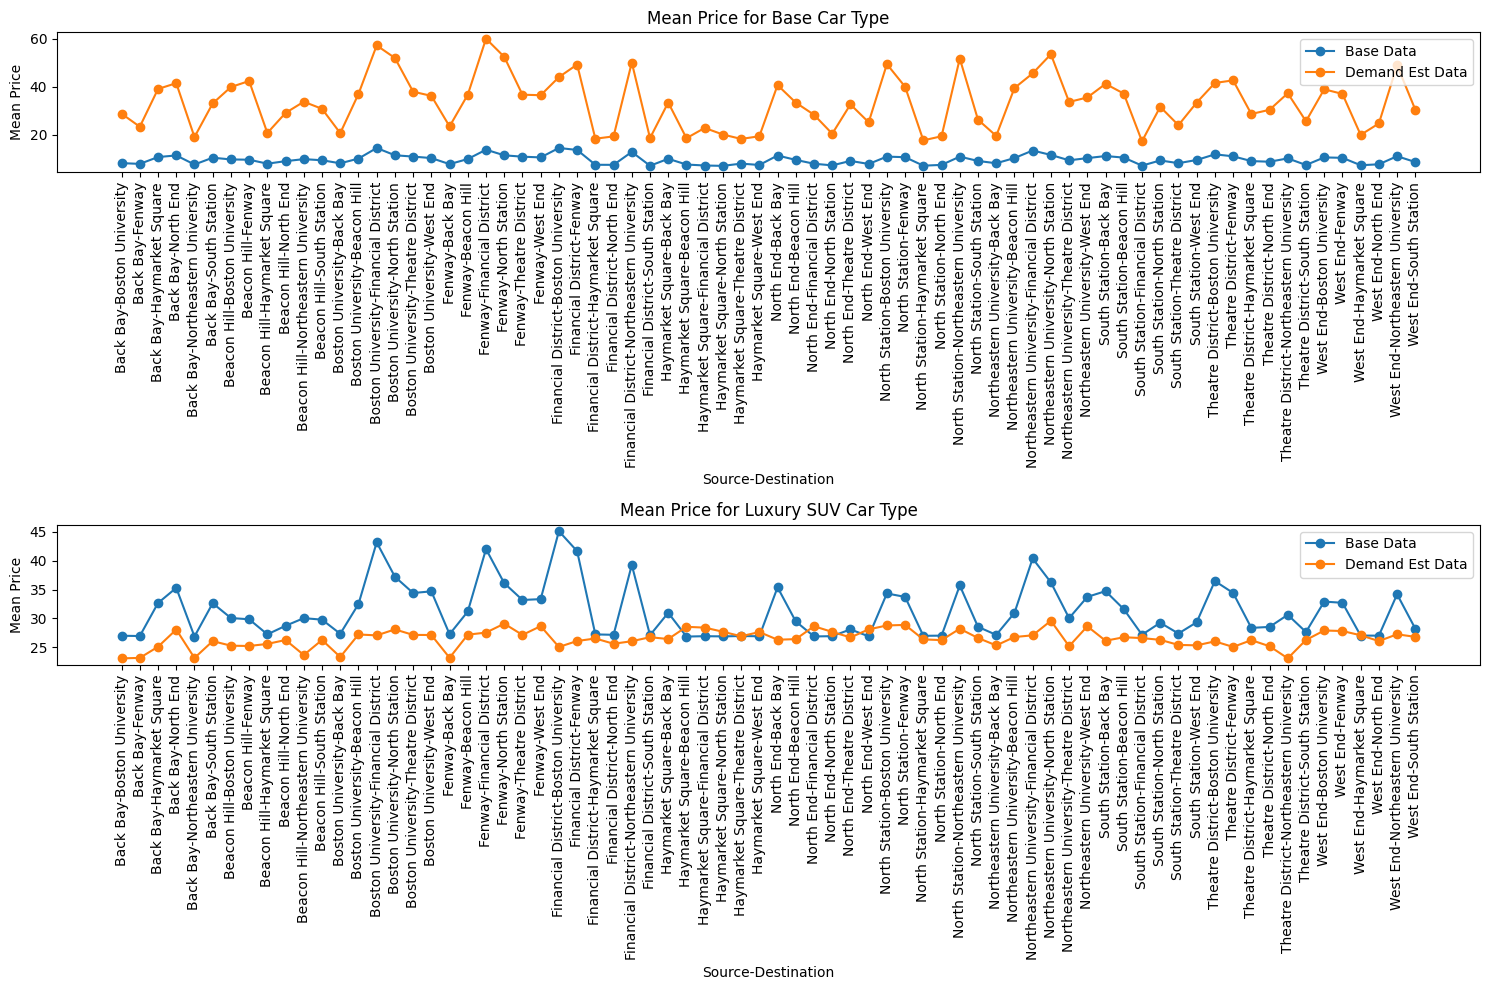

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

mean_base_base_df, mean_base_demand_df, mean_luxury_base_df,mean_luxury_demand_df = get_mean_data(base_df,demand_df)
# Plot for 'Base' car type
plot_mean_price(mean_base_base_df, 'Mean Price for Base Car Type', 'Base Data', axs[0])
plot_mean_price(mean_base_demand_df, 'Mean Price for Base Car Type', 'Demand Est Data', axs[0])

# Plot for 'Luxury SUV' car type
plot_mean_price(mean_luxury_base_df, 'Mean Price for Luxury SUV Car Type', 'Base Data', axs[1])
plot_mean_price(mean_luxury_demand_df, 'Mean Price for Luxury SUV Car Type', 'Demand Est Data', axs[1])

plt.tight_layout()
# Save Data to Visualizations Folder 
plt.savefig('Visuals/demand_est_quality.png')
plt.show()




In [ ]:
get_mean_difference(base_df, demand_df)